In [1]:
import pandas as pd
import os

In [3]:
directory_path = r'C:\Users\KINJAL\Desktop\Data Science\archive\AdienceBenchmarkGenderAndAgeClassification'
file_names = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.txt')]

In [4]:
df_list = []
for file_name in file_names:
    try:
        df_temp = pd.read_csv(file_name, sep='\t')
        df_list.append(df_temp)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

In [5]:
if df_list:
    df = pd.concat(df_list, axis=0, ignore_index=True)
    print(f"Combined DataFrame shape: {df.shape}")
else:
    print("No valid DataFrames to concatenate.")

Combined DataFrame shape: (19370, 12)


In [6]:
df_list

[            user_id                original_image  face_id       age gender  \
 0      30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25, 32)      f   
 1      30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25, 32)      m   
 2      30601258@N03  10437979845_5985be4b26_o.jpg        1  (25, 32)      f   
 3      30601258@N03  10437979845_5985be4b26_o.jpg        3  (25, 32)      m   
 4      30601258@N03  11816644924_075c3d8d59_o.jpg        2  (25, 32)      m   
 ...             ...                           ...      ...       ...    ...   
 4479   68094148@N04  11373794746_4720ac792a_o.jpg      478  (25, 32)      m   
 4480   68094148@N04  11355711315_0f5b5da125_o.jpg      477  (25, 32)      f   
 4481   10693681@N00   9162730346_b1bf71120a_o.jpg      479  (25, 32)      m   
 4482  113830953@N04  11855529986_dff116e018_o.jpg      480       NaN    NaN   
 4483  113830953@N04  11855531166_90b5b3670d_o.jpg      480       NaN    NaN   
 
          x     y    dx    dy  tilt_an

In [8]:
df.ffill(inplace=True)

In [9]:
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,"(25, 32)",f,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,"(25, 32)",f,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,"(25, 32)",f,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,"(25, 32)",f,1027,946,408,408,-85,0,49


In [10]:
df[['age_start', 'age_end']] = df['age'].str.extract(r'\((\d+),\s*(\d+)\)')

In [11]:
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_start,age_end
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17,25,32
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94,25,32
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74,25,32
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47,25,32
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34,25,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,"(25, 32)",f,596,460,1472,1473,-75,0,30,25,32
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,"(25, 32)",f,1179,755,331,331,5,0,108,25,32
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,"(25, 32)",f,1201,1179,293,293,5,0,99,25,32
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,"(25, 32)",f,1027,946,408,408,-85,0,49,25,32


In [16]:
print(df[['age_start', 'age_end']].dtypes)

age_start    object
age_end      object
dtype: object


In [17]:
print(df[['age_start', 'age_end']].isna().sum())

age_start    1103
age_end      1103
dtype: int64


In [18]:
df['age_start'] = pd.to_numeric(df['age_start'], errors='coerce')
df['age_end'] = pd.to_numeric(df['age_end'], errors='coerce')

In [20]:
df['age_start'].fillna(df['age_start'].median(), inplace=True)
df['age_end'].fillna(df['age_end'].median(), inplace=True)

C:\Users\KINJAL\AppData\Local\Temp\ipykernel_220\2735492646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_start'].fillna(df['age_start'].median(), inplace=True)
C:\Users\KINJAL\AppData\Local\Temp\ipykernel_220\2735492646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [21]:
print(df[['age_start', 'age_end']].isna().sum())

age_start    0
age_end      0
dtype: int64


In [22]:
df['age_start'] = df['age_start'].astype(int)
df['age_end'] = df['age_end'].astype(int)

In [23]:
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_start,age_end
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17,25,32
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94,25,32
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74,25,32
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47,25,32
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34,25,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,"(25, 32)",f,596,460,1472,1473,-75,0,30,25,32
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,"(25, 32)",f,1179,755,331,331,5,0,108,25,32
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,"(25, 32)",f,1201,1179,293,293,5,0,99,25,32
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,"(25, 32)",f,1027,946,408,408,-85,0,49,25,32


In [24]:
df['gender'] = df['gender'].map({'f': 0, 'm': 1})

In [25]:
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_start,age_end
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",0.0,0,414,1086,1383,-115,30,17,25,32
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",1.0,301,105,640,641,0,0,94,25,32
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",0.0,2395,876,771,771,175,-30,74,25,32
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",1.0,752,1255,484,485,180,0,47,25,32
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",1.0,175,80,769,768,-75,0,34,25,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,"(25, 32)",0.0,596,460,1472,1473,-75,0,30,25,32
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,"(25, 32)",0.0,1179,755,331,331,5,0,108,25,32
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,"(25, 32)",0.0,1201,1179,293,293,5,0,99,25,32
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,"(25, 32)",0.0,1027,946,408,408,-85,0,49,25,32


In [33]:
mode_gender = df['gender'].mode()[0]

In [34]:
df['gender'].fillna(mode_gender, inplace=True)

C:\Users\KINJAL\AppData\Local\Temp\ipykernel_220\1773504133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(mode_gender, inplace=True)


In [35]:
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_start,age_end
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",0.0,0,414,1086,1383,-115,30,17,25,32
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",1.0,301,105,640,641,0,0,94,25,32
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",0.0,2395,876,771,771,175,-30,74,25,32
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",1.0,752,1255,484,485,180,0,47,25,32
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",1.0,175,80,769,768,-75,0,34,25,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,"(25, 32)",0.0,596,460,1472,1473,-75,0,30,25,32
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,"(25, 32)",0.0,1179,755,331,331,5,0,108,25,32
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,"(25, 32)",0.0,1201,1179,293,293,5,0,99,25,32
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,"(25, 32)",0.0,1027,946,408,408,-85,0,49,25,32


In [45]:
print(df.isna().sum())

user_id               0
original_image        0
face_id               0
age                   0
gender                0
x                     0
y                     0
dx                    0
dy                    0
tilt_ang              0
fiducial_yaw_angle    0
fiducial_score        0
age_start             0
age_end               0
dtype: int64


In [46]:
df.describe()

,face_id,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_start,age_end
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,0.451988,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598,20.880330,27.318431
std,645.385251,0.497702,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247,15.887984,21.643815
min,1.000000,0.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000,0.000000,2.000000
25%,486.000000,0.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000,8.000000,12.000000
50%,980.000000,0.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000,25.000000,32.000000
75%,1526.000000,1.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000,25.000000,32.000000
max,2284.000000,1.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000,60.000000,100.000000


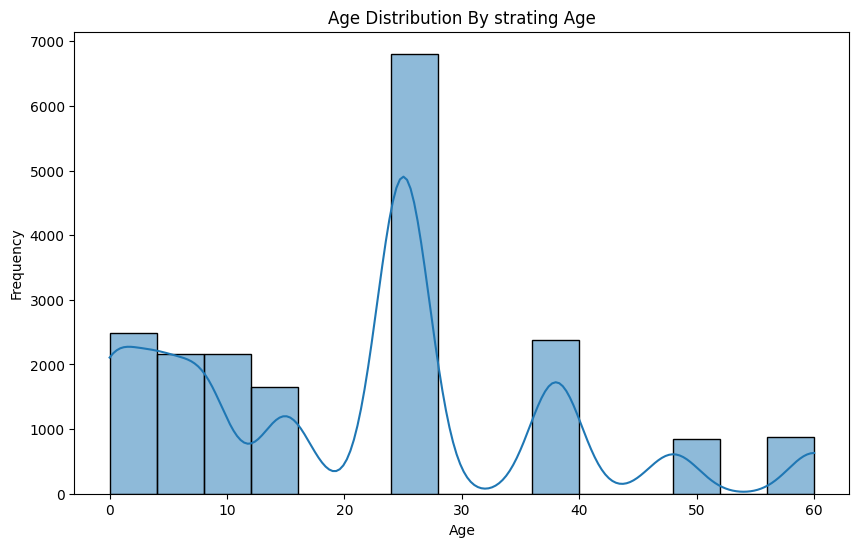

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['age_start'], bins=15, kde=True)
plt.title('Age Distribution By strating Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

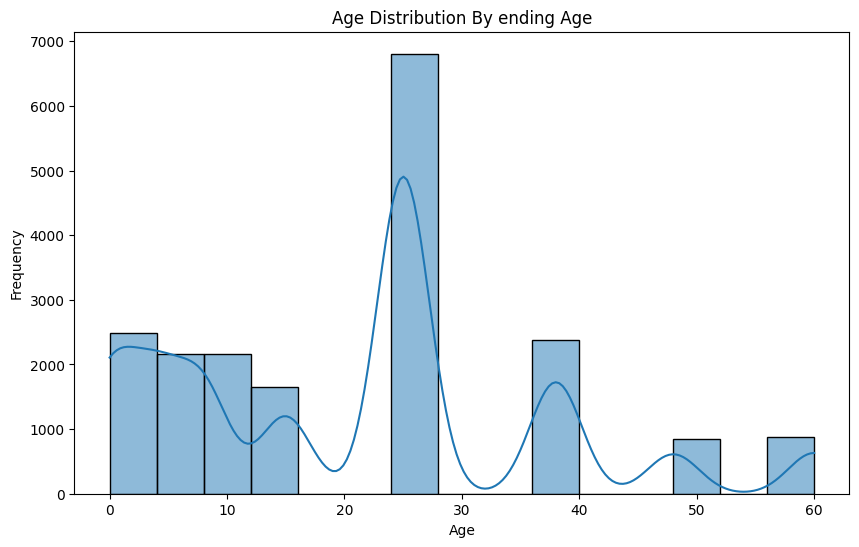

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['age_start'], bins=15, kde=True)
plt.title('Age Distribution By ending Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

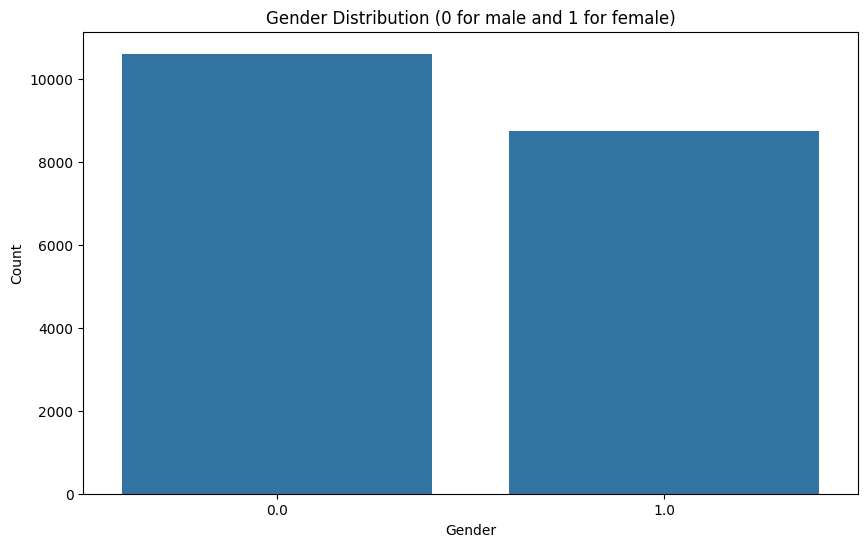

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution (0 for male and 1 for female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

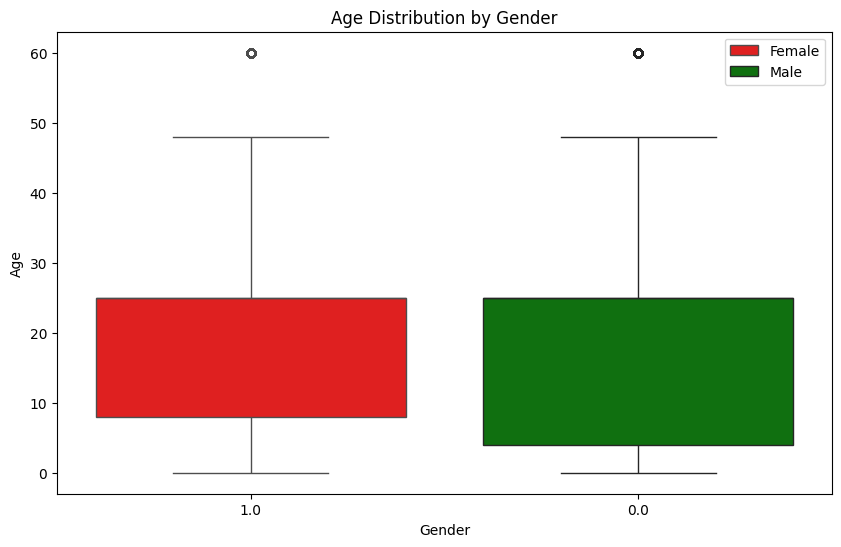

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['gender'] == 1], x='gender', y='age_start', color='r', label='Female')
sns.boxplot(data=df[df['gender'] == 0], x='gender', y='age_start', color='g', label='Male')

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend()
plt.show()

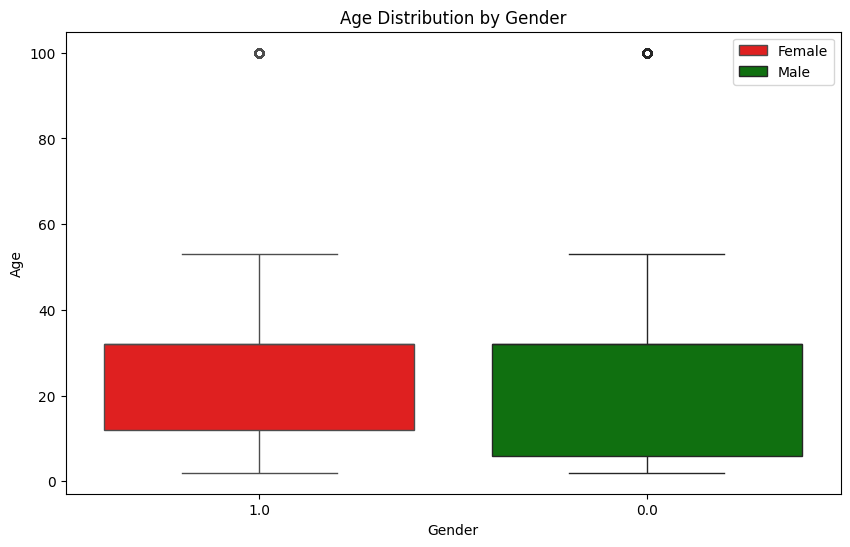

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['gender'] == 1], x='gender', y='age_end', color='r', label='Female')
sns.boxplot(data=df[df['gender'] == 0], x='gender', y='age_end', color='g', label='Male')

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend()
plt.show()

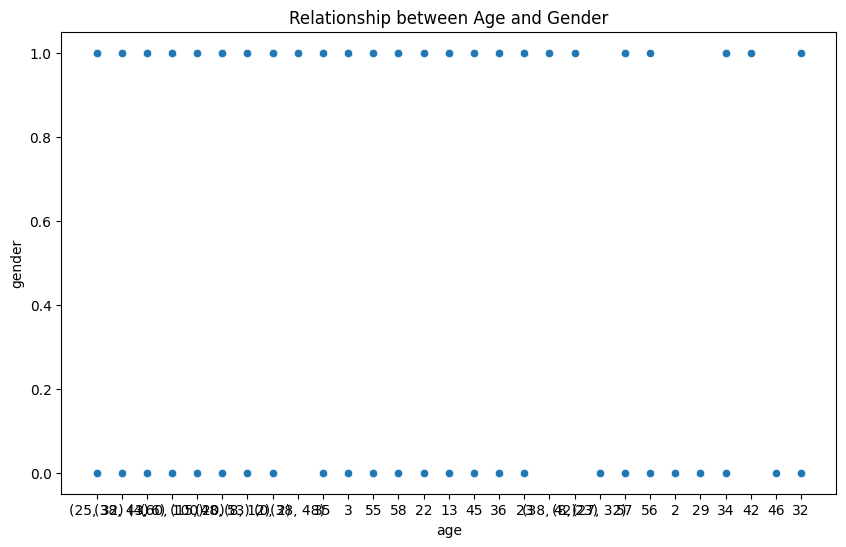

<Figure size 1000x600 with 0 Axes>

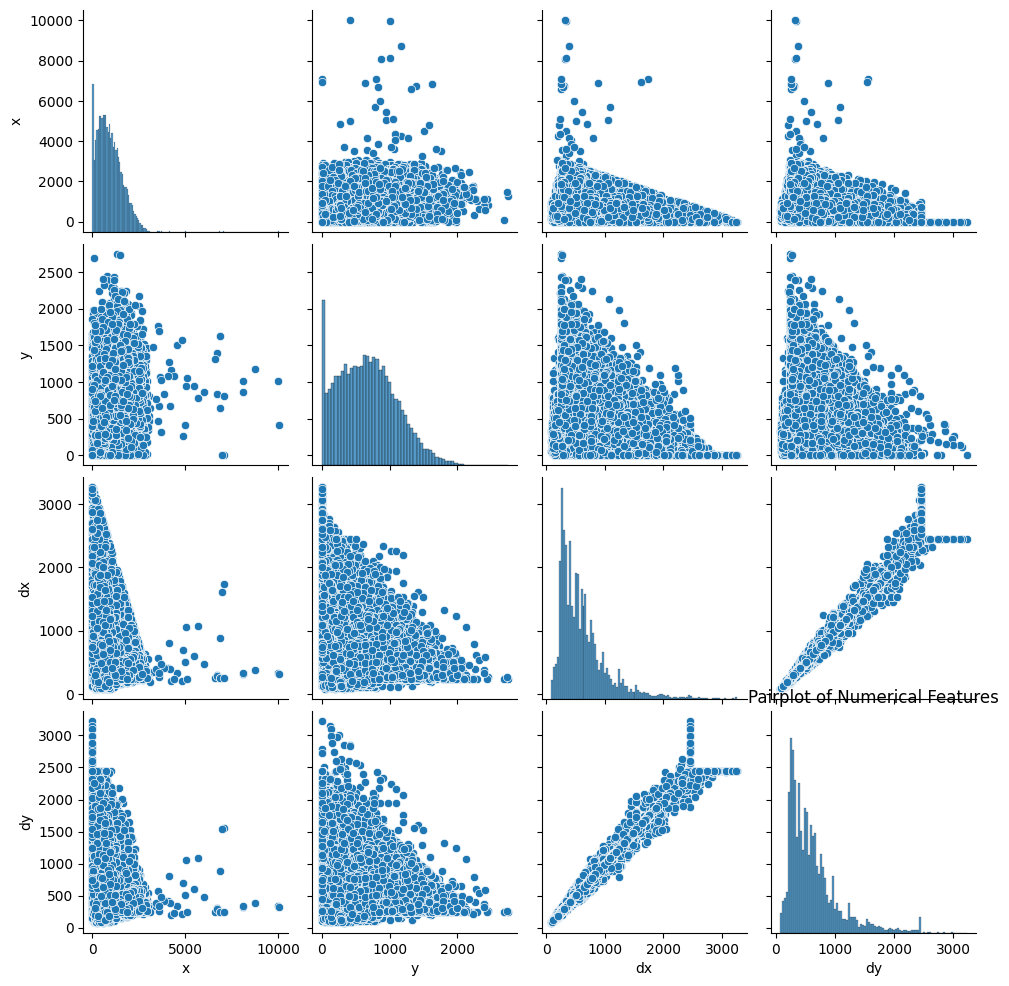

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='gender')
plt.title('Relationship between Age and Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(df[['x', 'y', 'dx', 'dy']])
plt.title('Pairplot of Numerical Features')
plt.show()

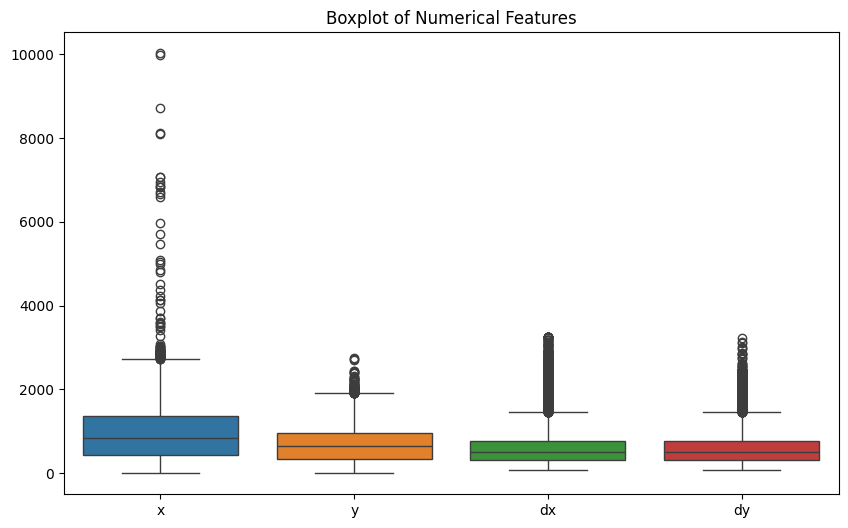

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['x', 'y', 'dx', 'dy']])
plt.title('Boxplot of Numerical Features')
plt.show()

C:\Users\KINJAL\AppData\Local\Temp\ipykernel_220\3590581097.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Range Start')


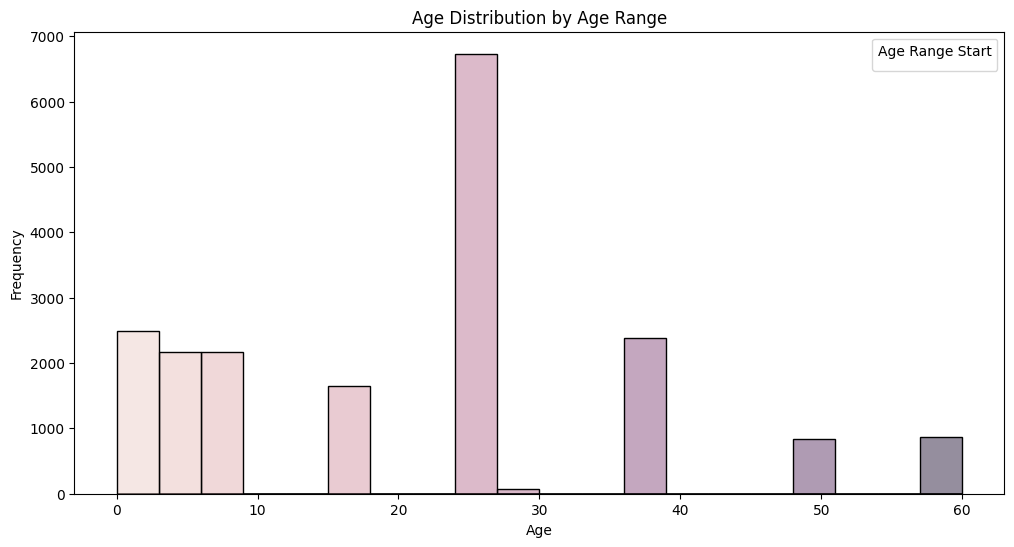

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age_start', bins=20, kde=True, hue='age_start')
plt.title('Age Distribution by Age Range')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Age Range Start')
plt.show()

C:\Users\KINJAL\AppData\Local\Temp\ipykernel_220\3845767386.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Range End')


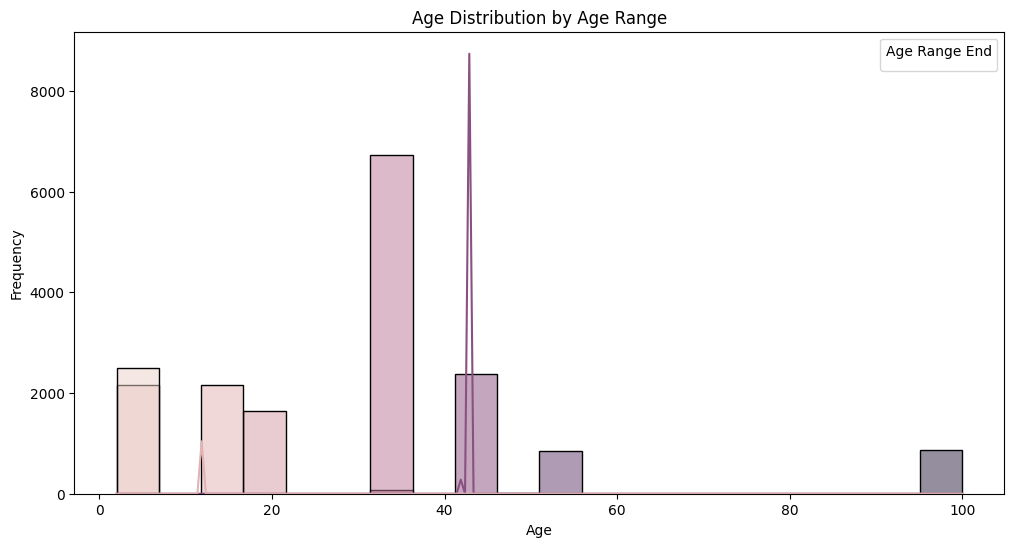

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age_end', bins=20, kde=True, hue='age_start')
plt.title('Age Distribution by Age Range')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Age Range End')
plt.show()

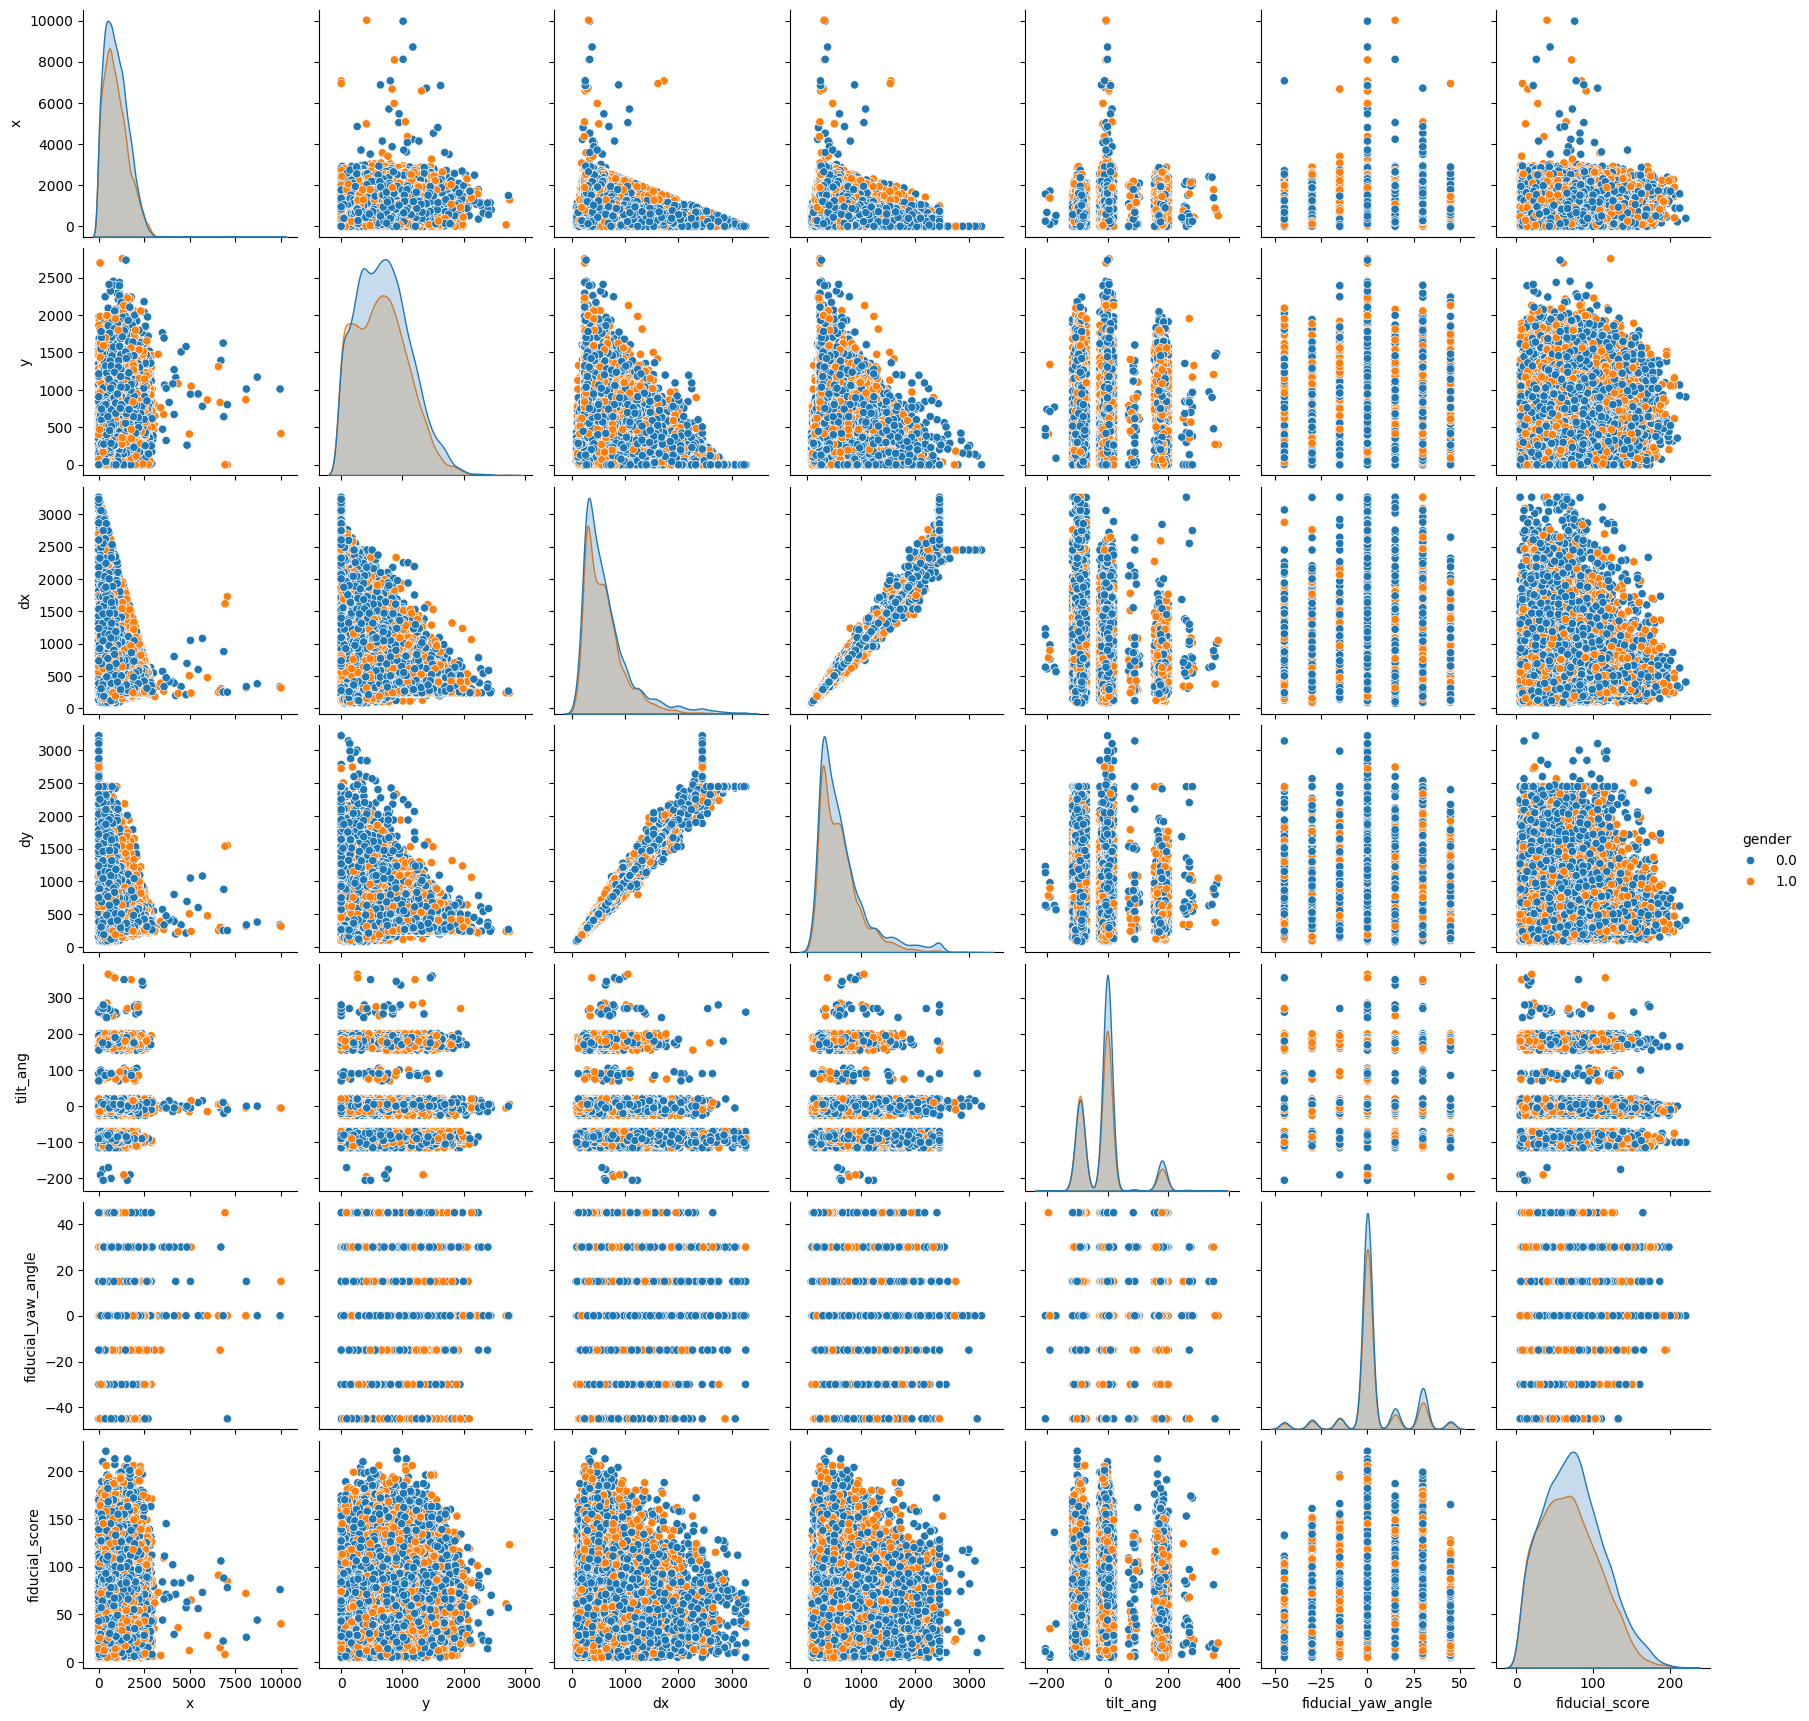

In [78]:
sns.pairplot(df[['age', 'x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score', 'gender']], hue='gender')
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
X = df.drop(['user_id', 'original_image', 'face_id'], axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train_scaled shape:", X_train)
print("y_train shape:", y_train.shape)

X_train_scaled shape:             age  gender     x     y    dx    dy  tilt_ang  fiducial_yaw_angle  \
9264     (0, 2)       0   691   554   638   638       -25                   0   
11176    (4, 6)       0   838   777  1013  1014        10                   0   
3855   (25, 32)       0   836   986   491   491         5                   0   
18247   (8, 12)       1   949   969   319   318       -10                   0   
4168         36       0   149     0   933   894       -85                   0   
...         ...     ...   ...   ...   ...   ...       ...                 ...   
11284  (25, 32)       0  1050   376   656   656         5                  15   
11964  (25, 32)       1  1233  1004   255   255       -90                   0   
5390   (15, 20)       1   870  1413   618   619        10                   0   
860    (48, 53)       0   845   228  1175  1175       -15                  30   
15795    (4, 6)       1   466  1110   625   625        -5                 -15   

     